In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import plotly.offline as py
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, Nadam


plt.rcParams['figure.figsize'] = 10, 10

In [16]:
train = pd.read_json("./iceberg/train.json")
test = pd.read_json("./iceberg/test.json")

In [17]:
print(train.shape)
print(test.shape)

(1604, 5)
(8424, 4)


In [18]:
train.head(10)

,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0
5,b51d18b5,"[-20.769371, -20.769434, -25.906025, -25.90602...","[-29.288746, -29.712593, -28.884804, -28.88480...",36.9034,1
6,31da1a04,"[-26.673811, -23.666162, -27.622442, -28.31768...","[-24.557735, -26.97868, -27.622442, -29.073456...",34.4751,1
7,56929c16,"[-24.989119, -27.755224, -25.817074, -24.98927...","[-27.755173, -26.732174, -28.124943, -31.83772...",41.1769,0
8,525ab75c,"[-17.146641, -17.146572, -17.994583, -19.44553...","[-25.733608, -24.472507, -24.710424, -22.77215...",35.7829,0
9,192f56eb,"[-24.020853, -23.551275, -27.18819, -29.126434...","[-28.702518, -33.563324, -29.571918, -29.12643...",43.3007,0


In [19]:
test.head()

,id,band_1,band_2,inc_angle
0,5941774d,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",34.966400
1,4023181e,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",32.615072
2,b20200e4,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",37.505433
3,e7f018bb,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",34.473900
4,4371c8c3,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",43.918874


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1604 non-null   object
 1   band_1      1604 non-null   object
 2   band_2      1604 non-null   object
 3   inc_angle   1604 non-null   object
 4   is_iceberg  1604 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 62.8+ KB


In [21]:
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], X_band_2[:, :, :, np.newaxis],((X_band_1+X_band_2)/2)[:, :, :, np.newaxis]], axis=-1)

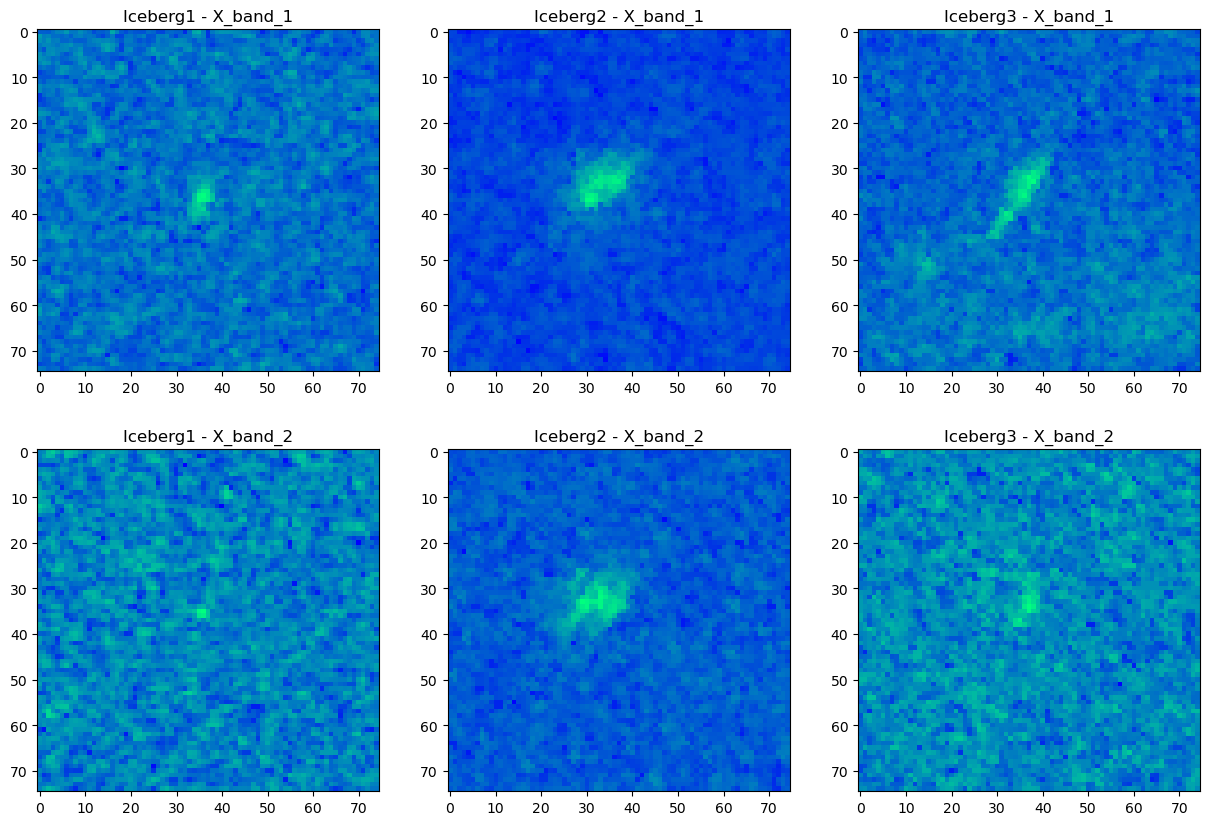

In [22]:
fig, ((ax1, ax3, ax5), (ax2, ax4, ax6)) = plt.subplots(2, 3, figsize=(15, 10))

#Subplot for X_band_1
arr1 = np.reshape(np.array(X_band_1[2]), (75, 75))
ax1.imshow(arr1, cmap='winter')
ax1.set_title('Iceberg1 - X_band_1')

arr1 = np.reshape(np.array(X_band_1[5]), (75, 75))
ax3.imshow(arr1, cmap='winter')
ax3.set_title('Iceberg2 - X_band_1')

arr1 = np.reshape(np.array(X_band_1[6]), (75, 75))
ax5.imshow(arr1, cmap='winter')
ax5.set_title('Iceberg3 - X_band_1')

#Subplot for X_band_2
arr2 = np.reshape(np.array(X_band_2[2]), (75, 75))
ax2.imshow(arr2, cmap='winter')
ax2.set_title('Iceberg1 - X_band_2')

arr2 = np.reshape(np.array(X_band_2[5]), (75, 75))
ax4.imshow(arr2, cmap='winter')
ax4.set_title('Iceberg2 - X_band_2')

arr2 = np.reshape(np.array(X_band_2[6]), (75, 75))
ax6.imshow(arr2, cmap='winter')
ax6.set_title('Iceberg3 - X_band_2')

plt.show()

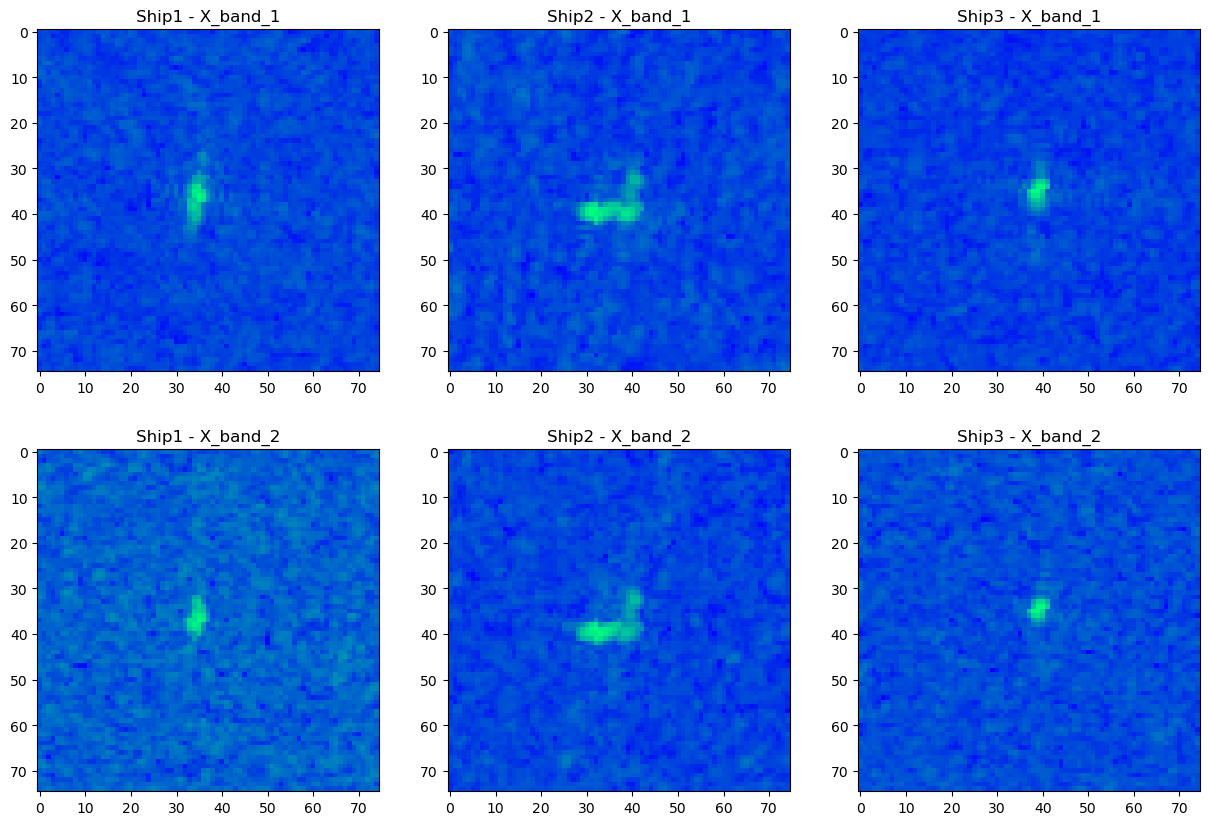

In [23]:
fig, ((ax1, ax3, ax5), (ax2, ax4, ax6)) = plt.subplots(2, 3, figsize=(15, 10))

#Subplot for X_band_1
arr1 = np.reshape(np.array(X_band_1[0]), (75, 75))
ax1.imshow(arr1, cmap='winter')
ax1.set_title('Ship1 - X_band_1')

arr1 = np.reshape(np.array(X_band_1[1]), (75, 75))
ax3.imshow(arr1, cmap='winter')
ax3.set_title('Ship2 - X_band_1')

arr1 = np.reshape(np.array(X_band_1[3]), (75, 75))
ax5.imshow(arr1, cmap='winter')
ax5.set_title('Ship3 - X_band_1')

#Subplot for X_band_2
arr2 = np.reshape(np.array(X_band_2[0]), (75, 75))
ax2.imshow(arr2, cmap='winter')
ax2.set_title('Ship1 - X_band_2')

arr2 = np.reshape(np.array(X_band_2[1]), (75, 75))
ax4.imshow(arr2, cmap='winter')
ax4.set_title('Ship2 - X_band_2')

arr2 = np.reshape(np.array(X_band_2[3]), (75, 75))
ax6.imshow(arr2, cmap='winter')
ax6.set_title('Ship3 - X_band_2')

plt.show()

In [24]:
py.init_notebook_mode(connected=True)
def plotmy3d(c, name):

    data = [
        go.Surface(
            z=c,
            colorscale='viridis'
        )
    ]
    layout = go.Layout(
        title=name,
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)
plotmy3d(X_band_1[2,:,:], 'Iceberg1')
plotmy3d(X_band_1[5,:,:], 'Iceberg2')

In [25]:
plotmy3d(X_band_1[0,:,:], 'Ship1')

In [26]:
convNN1 = Sequential()
convNN1.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
convNN1.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
convNN1.add(Dropout(0.2))

#Conv Layer 2
convNN1.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
convNN1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
convNN1.add(Dropout(0.2))

#Conv Layer 3
convNN1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
convNN1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
convNN1.add(Dropout(0.2))

#Flatten the data for upcoming dense layers
convNN1.add(Flatten())

#Dense Layers
convNN1.add(Dense(256))
convNN1.add(Activation('relu'))
convNN1.add(Dropout(0.3))

#Dense Layer 2
convNN1.add(Dense(128))
convNN1.add(Activation('relu'))
convNN1.add(Dropout(0.3))

#Dense Layer 3
convNN1.add(Dense(64))
convNN1.add(Activation('relu'))
convNN1.add(Dropout(0.3))

#Sigmoid Layer
convNN1.add(Dense(1))
convNN1.add(Activation('sigmoid'))

convNN1.compile(loss='binary_crossentropy',
                  optimizer=Adam(lr=0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon=1e-08),
                  metrics=['accuracy'])
convNN1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 73, 73, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 36, 36, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 128)      0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 17, 17, 128)      

/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [27]:
target_train=train['is_iceberg']
X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_train, target_train, random_state=1, train_size=0.75)

In [28]:
history = convNN1.fit(X_train_cv, y_train_cv,
          batch_size=24,
          epochs=150,
          verbose=1,
          validation_data=(X_valid, y_valid))

Epoch 1/150
51/51 [==============================] - 16s 316ms/step - loss: 1.0541 - accuracy: 0.5694 - val_loss: 0.5762 - val_accuracy: 0.6584
Epoch 2/150
51/51 [==============================] - 14s 284ms/step - loss: 0.5533 - accuracy: 0.6750 - val_loss: 0.5394 - val_accuracy: 0.7257
Epoch 3/150
51/51 [==============================] - 16s 307ms/step - loss: 0.5254 - accuracy: 0.7132 - val_loss: 0.5137 - val_accuracy: 0.7207
Epoch 4/150
51/51 [==============================] - 15s 286ms/step - loss: 0.5274 - accuracy: 0.7182 - val_loss: 0.4961 - val_accuracy: 0.7382
Epoch 5/150
51/51 [==============================] - 15s 290ms/step - loss: 0.4864 - accuracy: 0.7664 - val_loss: 0.4648 - val_accuracy: 0.7930
Epoch 6/150
51/51 [==============================] - 15s 293ms/step - loss: 0.4647 - accuracy: 0.7855 - val_loss: 0.4527 - val_accuracy: 0.8005
Epoch 7/150
51/51 [==============================] - 15s 294ms/step - loss: 0.4844 - accuracy: 0.7731 - val_loss: 0.4453 - val_accuracy:

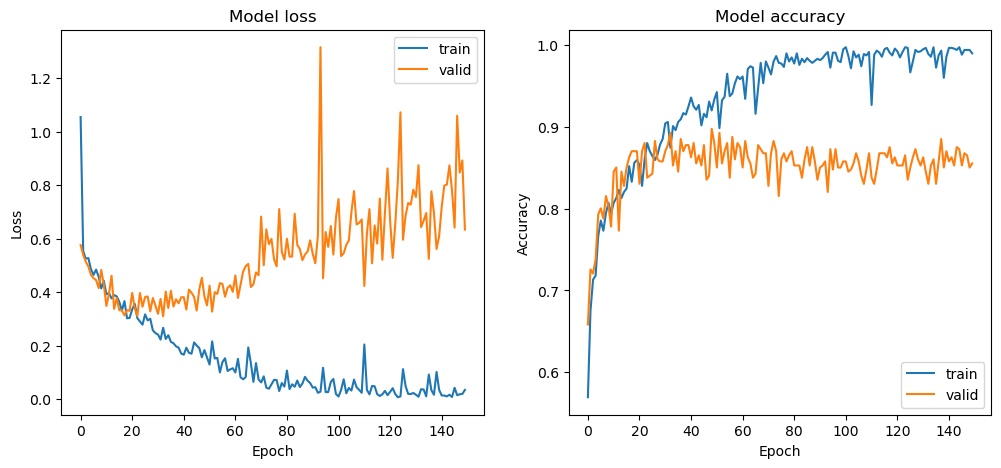

In [29]:
train_loss = history.history['loss']
valid_loss = history.history['val_loss']
train_acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(train_loss)
ax1.plot(valid_loss)
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'valid'], loc='upper right')

ax2.plot(train_acc)
ax2.plot(valid_acc)
ax2.set_title('Model accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'valid'], loc='lower right')

plt.show()

In [30]:
score = convNN1.evaluate(X_valid, y_valid, verbose=1)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

13/13 [==============================] - 1s 72ms/step - loss: 0.6340 - accuracy: 0.8554
Test loss:  0.6339980959892273
Test accuracy:  0.8553615808486938
